In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip -O /tmp/messy_vs_clean_room.zip

--2020-10-14 15:37:27--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/messy-vs-clean-room.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70392746 (67M) [application/zip]
Saving to: ‘/tmp/messy_vs_clean_room.zip’

/tmp/messy_vs_clean 100%[===================>]  67.13M  9.17MB/s    in 10s     

2020-10-14 15:37:38 (6.54 MB/s) - ‘/tmp/messy_vs_clean_room.zip’ saved [70392746/70392746]



In [ ]:
import zipfile, os
 
local_zip = '/tmp/messy_vs_clean_room.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()
 
base_dir = '/tmp/images'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [ ]:
os.listdir('/tmp/images/train')
os.listdir('/tmp/images/val')

['clean', 'messy']

In [ ]:
train_clean_dir = os.path.join(train_dir, 'clean')
train_messy_dir = os.path.join(train_dir, 'messy')
 
validation_clean_dir = os.path.join(validation_dir, 'clean')
validation_messy_dir = os.path.join(validation_dir, 'messy')

In [ ]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')

In [ ]:
train_generator = train_datagen.flow_from_directory(
        train_dir,  # direktori data latih
        target_size=(150, 150),  # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4,
        # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')
 
validation_generator = test_datagen.flow_from_directory(
        validation_dir, # direktori data validasi
        target_size=(150, 150), # mengubah resolusi seluruh gambar menjadi 150x150 piksel
        batch_size=4, # karena kita merupakan masalah klasifikasi 2 kelas maka menggunakan class_mode = 'binary'
        class_mode='binary')

Found 192 images belonging to 2 classes.
Found 20 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=25,  # berapa batch yang akan dieksekusi pada setiap epoch
      epochs=20,
      validation_data=validation_generator, # menampilkan akurasi pengujian data validasi
      validation_steps=5,  # berapa batch yang akan dieksekusi pada setiap epoch
      verbose=2)

Epoch 1/20
25/25 - 6s - loss: 0.6932 - accuracy: 0.5100 - val_loss: 0.6407 - val_accuracy: 0.7500
Epoch 2/20
25/25 - 6s - loss: 0.6530 - accuracy: 0.6300 - val_loss: 0.6203 - val_accuracy: 0.7000
Epoch 3/20
25/25 - 6s - loss: 0.5975 - accuracy: 0.7200 - val_loss: 0.5681 - val_accuracy: 0.7000
Epoch 4/20
25/25 - 6s - loss: 0.5605 - accuracy: 0.7200 - val_loss: 0.4591 - val_accuracy: 0.8000
Epoch 5/20
25/25 - 7s - loss: 0.6499 - accuracy: 0.6600 - val_loss: 0.6664 - val_accuracy: 0.6000
Epoch 6/20
25/25 - 6s - loss: 0.6553 - accuracy: 0.5800 - val_loss: 0.6517 - val_accuracy: 0.5000
Epoch 7/20
25/25 - 6s - loss: 0.5981 - accuracy: 0.6100 - val_loss: 0.4663 - val_accuracy: 0.7500
Epoch 8/20
25/25 - 6s - loss: 0.5763 - accuracy: 0.7300 - val_loss: 0.5568 - val_accuracy: 0.6500
Epoch 9/20
25/25 - 6s - loss: 0.5324 - accuracy: 0.7200 - val_loss: 0.5078 - val_accuracy: 0.7000
Epoch 10/20
25/25 - 6s - loss: 0.5777 - accuracy: 0.7100 - val_loss: 0.5463 - val_accuracy: 0.7000
Epoch 11/20
25/25 -

In [ ]:
from google.colab import files
 
uploaded = files.upload()

Saving 1602690030624170201230.jpg to 1602690030624170201230.jpg


1602690030624170201230.jpg
clean


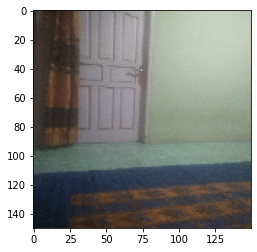

In [ ]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes==0:
    print('clean')
  else:
    print('messy')